# PCA Notebook
In this exercise we will apply the Principal Component Analysis (PCA) method to the Fashion MNIST dataset, a publicly available dataset of images. You are required to fill the "TODO" cells with Python code. The code scheleton, as well as the data loading part, are provided. 

Note: It is important that you first solve Problem 1 of the exercise sheet, so you have a clear picture of the theory behind PCA and of the steps to follow 

## Imports

In [58]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image
from keras.datasets import fashion_mnist

## Data Loading

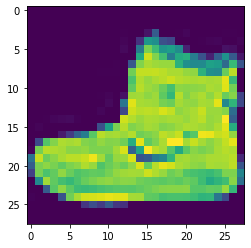

In [59]:
# Load Fashion MNIST dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Display first image
plt.imshow(trainX[0,:,:])
width, height = trainX[0,:,:].shape

In [60]:
# Take only a few samples of the shoe class
print(f'Num samples: {trainX.shape[0]}')
trainX = trainX[trainy == 9, :, :] 
print(f'Num samples: {trainX.shape[0]}')

Num samples: 60000
Num samples: 6000


In [61]:
# Only consider trainX, and compute input matrix X : n x d
X = trainX.reshape(trainX.shape[0], -1)

# Take only a few samples of the shoe class
X = X[:100,:]

print(X.shape)

(100, 784)


## Prepare the data for PCA analysis
In the first step, we simply standardize the data by removing the mean image and computing the covariance matrix of the data:
$$
\bar{X} = X ... 
$$ 
and
$$
\Sigma = ...
$$

In [62]:
# TODO: Subtract the mean image from input matrix X
X = X - X.mean(0)

In [63]:
# TODO: compute covariance matrix: 1/n * X * X^T, if X is a d x n matrix
covariance = .01 * X.T @ X

## PCA analysis
PCA proceeds in the following steps. First, we perform the  eigenvalue decomposition of the covariance matrix:
$$
\Sigma = ... 
$$ 
Then we select only the first $k$ singular vectors. Then we apply perform a change of basis of $\bar{X}$ as follows:
$$
\bar{Z} = ... 
$$
Finally, the dataset can be reconstructed by
$$
\tilde{X} = ...
$$

In [64]:
# Set k
k = 20

In [65]:
# TODO: Compute SVD of the covariance matrix
U, L, VT = np.linalg.svd(covariance)

In [66]:
U.shape

(784, 784)

In [67]:
# TODO: (optional) Extract first 5 eigenshoes which are represented by first 5 eigenvectors (columns of matrix U)
u5 = U[:, :k]

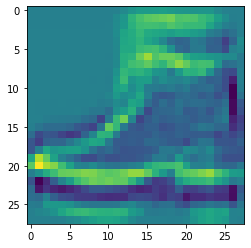

In [68]:
# TODO: (optional) visualize the eigenshoes extracted at the previous point
plt.imshow(u5[:, 4].reshape((28, 28)))

In [69]:
# TODO: Build projection matrix U_k
U_k = U[:, :k]

In [70]:
# TODO: Apply change of basis
Z = (U_k.T @ X.T).T

In [71]:
# TODO: Perform image decompression (don't forget to add back the original mean of the data)
X_reconstr = (U_k @ Z.T).T + trainX.reshape(trainX.shape[0], -1)[:100,:].mean(0)

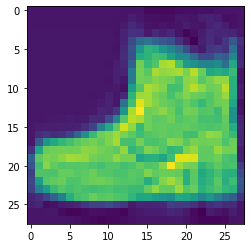

In [72]:
# TODO: Plot one original image to see how good our decompression is
plt.imshow(X_reconstr[0].reshape((28, 28)))